In [1]:
# import sys
# !{sys.executable} -mpip install --upgrade jupyterlab ipympl

In [2]:
%matplotlib widget

In [3]:
import shapefile
import matplotlib.pyplot as plt
import numpy as np

In [4]:
sf = shapefile.Reader("floorplans/Floorplans")

In [5]:
sf.bbox

[-453.3071201443672, -713.8790064007044, 4033.3089066147804, 4442.174985930324]

In [6]:
shape_example = sf.shapes()[0]

In [7]:
shape_example.points

[(3881.5044201910496, 4092.6947137713432),
 (3884.129414945841, 4092.5959606915712),
 (3886.644829854369, 4093.352848932147),
 (3892.5021016150713, 4091.098588347435),
 (3883.3200333565474, 4067.2406964302063),
 (3860.7127951085567, 4075.941794514656),
 (3869.8948633521795, 4099.799358353019),
 (3875.68028485775, 4097.572984859347),
 (3877.0392060279846, 4095.324957847595),
 (3879.0529815256596, 4093.6382814347744),
 (3881.5044201910496, 4092.6947137713432)]

In [8]:
# sf.fields

In [9]:
records = sf.shapeRecords()

In [10]:
len(records)

15156

In [11]:
shape_record_ex = records[0]

In [12]:
shape_record_ex.shape.bbox

[3860.7127951085567, 4067.2406964302063, 3892.5021016150713, 4099.799358353019]

In [13]:
np.average(shape_record_ex.shape.points, axis=0)

array([3879.27139555, 4090.17771809])

In [14]:
shape_record_ex.shape.points

[(3881.5044201910496, 4092.6947137713432),
 (3884.129414945841, 4092.5959606915712),
 (3886.644829854369, 4093.352848932147),
 (3892.5021016150713, 4091.098588347435),
 (3883.3200333565474, 4067.2406964302063),
 (3860.7127951085567, 4075.941794514656),
 (3869.8948633521795, 4099.799358353019),
 (3875.68028485775, 4097.572984859347),
 (3877.0392060279846, 4095.324957847595),
 (3879.0529815256596, 4093.6382814347744),
 (3881.5044201910496, 4092.6947137713432)]

In [15]:
x,y = np.array(shape_record_ex.shape.points).T

In [16]:
x, y

(array([3881.50442019, 3884.12941495, 3886.64482985, 3892.50210162,
        3883.32003336, 3860.71279511, 3869.89486335, 3875.68028486,
        3877.03920603, 3879.05298153, 3881.50442019]),
 array([4092.69471377, 4092.59596069, 4093.35284893, 4091.09858835,
        4067.24069643, 4075.94179451, 4099.79935835, 4097.57298486,
        4095.32495785, 4093.63828143, 4092.69471377]))

In [70]:
record = shape_record_ex.record

In [71]:
# dir(record)

In [72]:
record.ROOM_ID

'SHC 0'

In [73]:
record.BLDG_LONG

'STUDENT HEALTH CENTER'

In [74]:
record.BLDG_SHORT

'SHC'

In [76]:
record.BLDG_LEVEL

0

In [22]:
# plt.ion()

In [23]:
from random import randint

In [175]:
bldg_colors = {}

In [176]:
for record in records:
    bldg_name = record.record.BLDG_SHORT
    if bldg_name not in bldg_colors:
        bldg_colors[bldg_name] = np.random.random(3)

In [42]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [141]:
bldg_records = [record for record in records if record.record.BLDG_SHORT == "JKB"]
len(bldg_records)

395

In [142]:
bbox

[-453.3071201443672, -713.8790064007044, 4033.3089066147804, 4442.174985930324]

In [143]:
bldg_bbox = [np.inf, np.inf, -np.inf, -np.inf]
levels = 0

for record in bldg_records:
    shape_bbox = record.shape.bbox
    level = record.record.BLDG_LEVEL
    if level > levels:
        levels = level
    x0, y0, x1, y1 = shape_bbox
    if x0 < bldg_bbox[0]:
        bldg_bbox[0] = x0
    if y0 < bldg_bbox[1]:
        bldg_bbox[1] = y0
    if x1 > bldg_bbox[2]:
        bldg_bbox[2] = x1
    if y1 > bldg_bbox[3]:
        bldg_bbox[3] = y1

In [144]:
x_length = bldg_bbox[2] - bldg_bbox[0]
y_length = bldg_bbox[3] - bldg_bbox[1]
x_length, y_length

(276.7750370055437, 323.67487758398056)

In [145]:
diff = np.abs(y_length - x_length)

if x_length < y_length:
    bldg_bbox[0] -= diff / 2
    bldg_bbox[2] += diff / 2
else:
    bldg_bbox[1] -= diff / 2
    bldg_bbox[3] += diff / 2
    
x_length = bldg_bbox[2] - bldg_bbox[0]
y_length = bldg_bbox[3] - bldg_bbox[1]
x_length, y_length

(323.67487758398056, 323.67487758398056)

In [146]:
bldg_bbox

[1595.9448508992791, 1115.6865601837635, 1919.6197284832597, 1439.361437767744]

In [147]:
np.random.random(3)

array([0.83876453, 0.98491729, 0.1502322 ])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
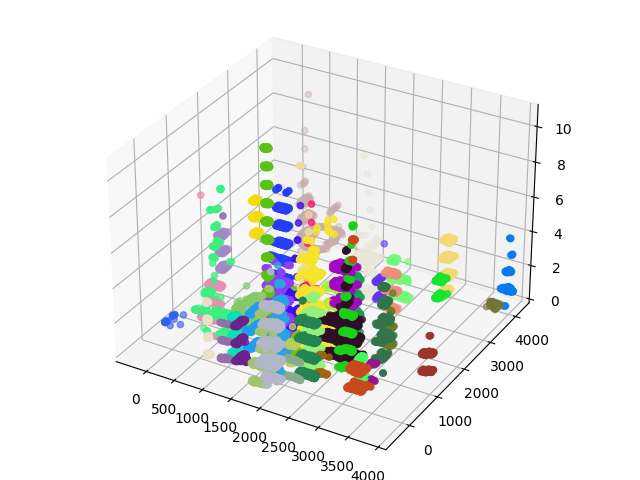

In [182]:
fig = plt.figure()
# plt.axes(projection="3d")
axes = mplot3d.Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(axes)
n_show = 100
n_offset = 100
bbox = sf.bbox
# axes.set_xlim3d(bldg_bbox[0], bldg_bbox[2])
# axes.set_ylim3d(bldg_bbox[1], bldg_bbox[3])
# axes.set_zlim3d(0, levels)
axes.set_xlim3d(bbox[0], bbox[2])
axes.set_ylim3d(bbox[1], bbox[3])
axes.set_zlim3d(0, 11)
# for record in records[n_offset:n_offset+n_show]:
# for record in np.random.choice(records, 1000):
all_points = []
colors = []
for record in records:
    points = np.array(record.shape.points)
    x, y = points.T
    ax, ay = np.average(points, axis=0)
    # plt.text(ax, ay, z, record.record.ROOM_ID)
    z = np.full((len(x)), [record.record.BLDG_LEVEL])
    # print(z)
    # print(np.array((x, y, z)))
    verts = np.average(np.array([x, y, z]), axis=1)
    all_points.append(verts)
    colors.append(bldg_colors[record.record.BLDG_SHORT])
    # print(verts)
    # axes.add_collection3d(Poly3DCollection(verts, facecolors=np.random.random(3)))
    # axes.scatter3D(verts)
    # plt.fill(x, y, z, zorder=1)
    
x, y, z = np.array(all_points).T
axes.scatter3D(x, y, z, c=colors)
plt.show()

# Thoughts on Unreal integration

We could create a special type of wireframe "hidden in game" actor for positioning _one or more_ buildings.

I'm a little worried about how well all of campus will line up, so I'm thinking we request and compute a bounding box for a comma separated list of buildings on the fly. So the points for all of the buildings specified as a comma separated Blueprint variable string.

[This documentation page](https://docs.unrealengine.com/4.27/en-US/BuildingWorlds/LevelEditor/InEditorTesting/KeepSimulationChanges/) seems to validate an approach I have in my head that I can't seem to explain—basically we could save changes made while simulating, and if we could get live visual feedback in simulation based on C++ code, then it would be a lot better if things didn't revert when we leave simulate mode.